In [346]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as anim
from tqdm import tqdm 


In [347]:
class Planeta:
    
    def __init__(self, e, a, t):
        
        self.t = t
        self.dt = t[1] - t[0] # Paso del tiempo
        
        self.e = e # Excentricidad
        self.a_ = a # Semi-eje mayor

        self.G = 4*np.pi**2 # Unidades gaussianas
        
        self.r = np.zeros(3)
        self.v = np.zeros_like(self.r)
        self.a = np.zeros_like(self.r)
        
        self.r[0] = self.a_*(1-self.e)
        self.v[1] = np.sqrt( self.G*(1+self.e)/(self.a_*(1.-self.e)) )
        
        self.R = np.zeros((len(t),len(self.r)))
        self.V = np.zeros_like(self.R)
        # El valor del pasado
        self.rp = self.r
        
    def GetAceleration(self):
        
        d = np.linalg.norm(self.r)
        self.a = -self.G/d**3*self.r
        
        
    def Evolution(self,i):
        
        self.SetPosition(i)
        self.SetVelocity(i)
        self.GetAceleration()
        
        if i==0:
            self.r = self.rp + self.v*self.dt
        else:
            
            # rp pasado, r presente rf futuro
            self.rf = 2*self.r - self.rp + self.a*self.dt**2
            self.v = (self.rf - self.rp)/(2*self.dt)
            
            self.rp = self.r
            self.r = self.rf
    
    def SetPosition(self,i):
        self.R[i] = self.r
        
    def SetVelocity(self,i):
        self.V[i] = self.v
    
    def GetPosition(self,scale=1):
        return self.R[::scale]
    
    def GetVelocity(self,scale=1):
        return self.V[::scale]
    
    def GetPerihelio(self):
        
        Dist = np.linalg.norm(self.R,axis=1)
        
        timeup = []
        indexes =[]
        
        for i in range(1,len(Dist)-1):
            if Dist[i] < Dist[i-1] and Dist[i] < Dist[i+1]:
                timeup.append(self.t[i])
                indexes.append(i)
            
        return timeup, indexes

    

    def GetPeriod(self):


        timeup,indexes= self.GetPerihelio()
        i= timeup.index(min(self.GetPerihelio()[0]))
        index= indexes[i]
        v= np.sqrt(self.V[index][1]**2+ self.V[index][2]**2)
        #1.1
 
        #return  (2*np.pi*self.a_)/v

        return self.GetPerihelio()[0][1]-self.GetPerihelio()[0][0]


    

In [348]:
def GetPlanetas(t):
    
    Mercurio = Planeta(0.2056,0.387,t)
    Venus = Planeta(0.0067,0.723,t)
    Tierra = Planeta(0.0167,1.,t)
    Marte= Planeta(0.0934,1.524,t)
    Jupiter= Planeta(0.0489, 5.203,t)
    
    return [Mercurio,Venus,Tierra,Marte,Jupiter]

In [349]:
dt = 0.001
tmax = 30
t = np.arange(0.,tmax,dt)
Planetas = GetPlanetas(t)

In [350]:
def RunSimulation(t,Planetas):
    
    for it in tqdm(range(len(t)), desc='Running simulation', unit=' Steps' ):
        
        
        for i in range(len(Planetas)):
            Planetas[i].Evolution(it)
            # Aca debes agregar la interaccion con la pared
            
            
    return Planetas

In [351]:
Planetas = RunSimulation(t,Planetas)

Running simulation: 100%|██████████| 30000/30000 [00:13<00:00, 2289.15 Steps/s]


In [352]:
scale = 20
t1 = t[::scale]

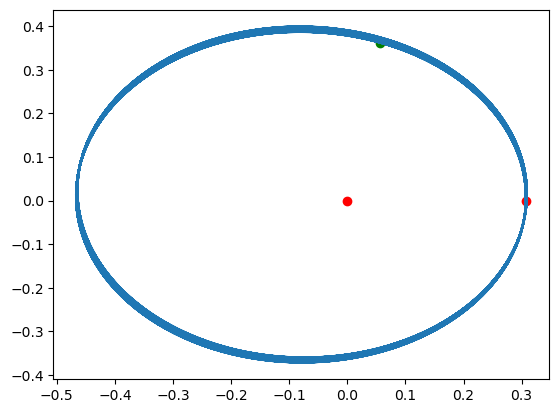

In [353]:
plt.plot(Planetas[0].GetPosition()[:,0],Planetas[0].GetPosition()[:,1])

plt.scatter(Planetas[0].GetPosition()[0:1,0], Planetas[0].GetPosition()[0:1,1], color='red')
plt.scatter(Planetas[0].GetPosition()[40:41,0], Planetas[0].GetPosition()[40:41,1], color='green')
plt.scatter(0,0, color='red')

c:\Users\Angie\anaconda3\lib\site-packages\matplotlib\animation.py:887: UserWarning: Animation was deleted without rendering anything. This is most likely not intended. To prevent deletion, assign the Animation to a variable, e.g. `anim`, that exists until you have outputted the Animation using `plt.show()` or `anim.save()`.
  warnings.warn(


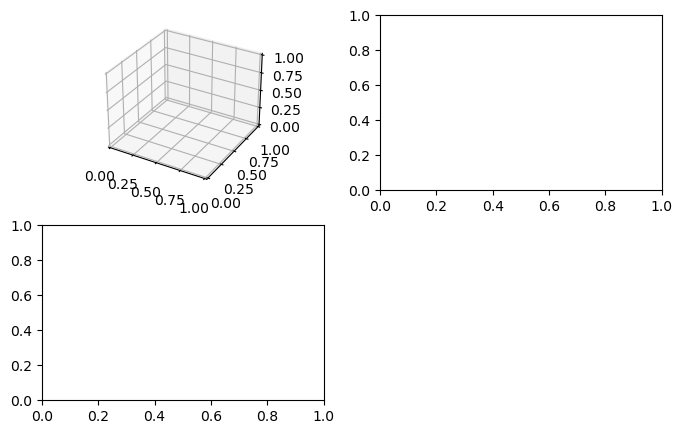

In [354]:
fig = plt.figure(figsize=(8,5))
ax = fig.add_subplot(221,projection='3d')
ax1 = fig.add_subplot(222)
ax2 = fig.add_subplot(223)

colors=['r','k','b']

def init():
    
    ax.clear()
    ax.set_xlim(-1,1)
    ax.set_ylim(-1,1)
    ax.set_zlim(-1,1)
    
    ax1.clear()
    ax1.set_xlim(-1,1)
    ax1.set_ylim(-1,1) 
    
    ax2.clear()
    ax2.set_xlim(-2,2)
    ax2.set_ylim(-2,2) 
    
def Update(i):
    
    init()
    
    for j, p in enumerate(Planetas):
        
        x = p.GetPosition(scale)[i,0]
        y = p.GetPosition(scale)[i,1]
        z = p.GetPosition(scale)[i,2]
        
        vx = p.GetVelocity(scale)[i,0]
        vy = p.GetVelocity(scale)[i,1]
        vz = p.GetVelocity(scale)[i,2]
    
        ax.scatter(0,0,0,s=200,color='y')
        ax.quiver(x,y,z,vx,vy,vz,color=colors[j],length=0.03)
        
        ax.scatter(x,y,z,color=colors[j])
        
        circle = plt.Circle((x,y),0.1,color=colors[j],fill=True)
        ax1.add_patch(circle)
    
    # Mercurio visto desde tierra
    Mx = Planetas[0].GetPosition(scale)[:i,0] - Planetas[2].GetPosition(scale)[:i,0]
    My = Planetas[0].GetPosition(scale)[:i,1] - Planetas[2].GetPosition(scale)[:i,1]
    
    # Venus visto desde tierra
    Vx = Planetas[1].GetPosition(scale)[:i,0] - Planetas[2].GetPosition(scale)[:i,0]
    Vy = Planetas[1].GetPosition(scale)[:i,1] - Planetas[2].GetPosition(scale)[:i,1]
    
    ax2.scatter(Mx,My,marker='.',label='Mercurio')
    ax2.scatter(Vx,Vy,marker='.',label='Venus')

    plt.show()
    
Animation = anim.FuncAnimation(fig,Update,frames=len(t1),init_func=init)

In [356]:
#Tk=[]
T1=[]
T2= []
a3=[]

for i in Planetas:
    T1.append(i.GetPeriod())
    T2.append((i.GetPeriod())**2)
    #Tk.append(i.GetPeriodK())
    a3.append((i.a_)**3)
print("Periodos")
print(["Mercurio","Venus","Tierra","Marte","Jupiter"])
print(T1)

Periodos
['Mercurio', 'Venus', 'Tierra', 'Marte', 'Jupiter']
[0.24099999999999996, 0.6139999999999999, 1.0, 1.881, 11.867999999999999]


In [357]:
def linearReg(x,y):

    n = len(x)
    avx = np.mean(x)
    avy = np.mean(y) 
    a1 = sum((x[i]-avx)*(y[i]-avy) for i in range(n))
    a2 = sum((x[i]-avx)**2 for i in range(n))
    m = a1/a2
    b = avy-(m*avx)
    
    return m, b

In [358]:
m,b = linearReg(a3,T2)
print("pendiente")
print(str(m))
print("punto de corte")
print(str(b))

pendiente
0.9999890118563779
punto de corte
-0.0005471105961838418


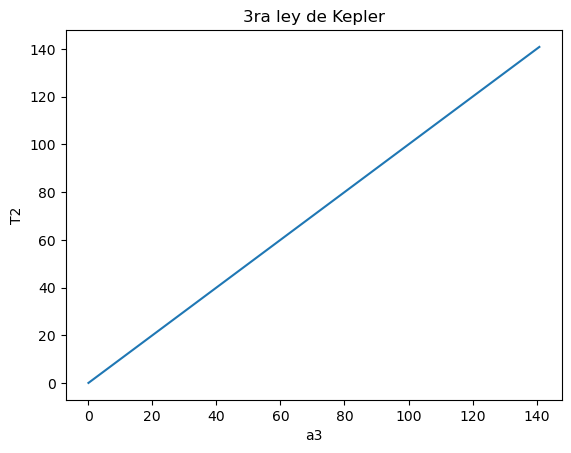

In [359]:
plt.plot(a3, T2)
plt.xlabel('a3')
plt.ylabel('T2')
plt.title('3ra ley de Kepler')
plt.show()

In [360]:
def SunMass(m,mp,smSI=1.989e30):

    sm= (1/m)-mp
    sSI= sm*smSI
    print("La masa del Sol en unidades solares es: "+ str(sm))
    print("La masa del Sol en SI es: "+ str(sSI))

In [361]:
s=1.989e30

M=[(3.285e23)/s,(4.867e24)/s,(5.972e24)/s,(6.39e23)/s,(1.898e27)/s]

In [362]:
for i in range(len(Planetas)):
    mp=M[i]
    SunMass(m,mp)


La masa del Sol en unidades solares es: 1.0000108231059917
La masa del Sol en SI es: 1.9890215271578174e+30
La masa del Sol en unidades solares es: 1.0000085413060922
La masa del Sol en SI es: 1.9890169886578172e+30
La masa del Sol en unidades solares es: 1.0000079857505366
La masa del Sol en SI es: 1.9890158836578172e+30
La masa del Sol en unidades solares es: 1.0000106669973943
La masa del Sol en SI es: 1.9890212166578172e+30
La masa del Sol en unidades solares es: 0.9990567398983495
La masa del Sol en SI es: 1.987123855657817e+30
